In [1]:
import numpy as np
from sklearn import decomposition
from sklearn import linear_model
import matplotlib.pyplot as plt
from collections import OrderedDict
import cv2
import dlib
%matplotlib inline


In [2]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('data/shape_predictor_68_face_landmarks.dat')

In [4]:
image = cv2.imread('./images/image.jpg')
image = image[:,:,::-1] # not effective but for rendering with matplotlib
size = (300, int(300 * image.shape[1] / image.shape[0]))
image = cv2.resize(image, size)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Locate face position
rects = detector(gray, 1)

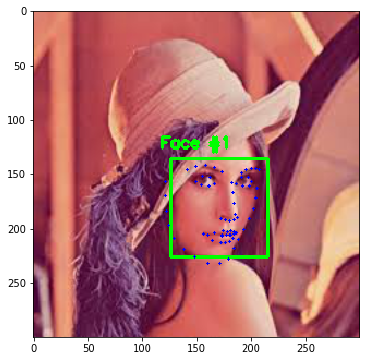

In [5]:
for (i, rect) in enumerate(rects):

    # draw rect
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # draw points
    shape = predictor(gray, rect)
    shape = [(p.x, p.y) for p in shape.parts()]
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)


plt.figure(figsize=(6, 6))
plt.imshow(image)
# cv2.waitKey(0)